<a href="https://colab.research.google.com/github/amalvarezme/AprendizajeMaquina/blob/main/NLP_Basics/NLP1_Tokens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Introduction to Natural Language Processing  

![NLP](https://f5b623aa.delivery.rocketcdn.me/wp-content/uploads/2022/10/How-NLP-Works-760px.jpg.avif)

# Tokenizers & Embeddings - From Raw Text to Meaningful Vectors

- Today, we will revisit the foundational pipeline of Natural Language Processing (NLP),

- As you'll see, the core principles are universal, even if the code looks a little different.

- **Goal** : to understand how we take human language and turn it into the structured numbers that a machine learning model can process.

## Main Concepts:

1.  **Tokenization**: Breaking down sentences into Lego bricks (words or sub-words).

![tokens](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*PZYP2nL6Zc_jpkaHLRxLQQ.png?raw=1)

2.  **Embedding**: Giving each Lego brick a specific set of coordinates in a "meaning space."

![embeddings](https://towardsdatascience.com/wp-content/uploads/2025/01/1tvdDIojXwTRpUW4jr4a72A.png?raw=1)

You will understand:

*   How to use [Hugging Face](https://huggingface.co/) tokenizers to prepare data specifically for TensorFlow models.

*   How to load a pre-trained Transformer model using Keras.

*   How to generate and inspect contextual embeddings from a model like BERT within the TensorFlow ecosystem.

*   That the high-level concepts of NLP are framework-agnostic.

---
## Tokenization - The Building Blocks of Language

### Why Do We Need It?

Models don't see "hello world". They see numbers. Tokenization is the first step in converting text to numbers. We create a vocabulary (a list of all unique tokens) and then map each token to a unique integer ID.

### Types of Tokenization

There are three main strategies, each with its own pros and cons:

- **Word-level**: The most intuitive approach. You split a sentence by spaces and punctuation.

  **Pros**: Simple, creates human-readable tokens.

  **Cons**: Struggles with "out-of-vocabulary" (OOV) words. What if the model was trained on "dog" but sees "dogs"? Or a typo like "dogg"? The vocabulary can also become enormous.

- **Character-level**: Split the text into individual characters.

  **Pros**: Very small vocabulary, no OOV problem.
  **Cons**: Loses the semantic meaning of a word. The sequence becomes very long, making it computationally expensive for models.

- **Subword-level (The Modern Standard)**: This is the brilliant compromise used by models like BERT, GPT, and T5. It breaks words into smaller, semantically meaningful parts.
  
  Frequently used words ("the", "and") remain as single tokens. Rarer words are broken down.
  
  For example, "tokenization" might become ["token", "##ization"]. The ## indicates that this subword is attached to the previous one.

  **Pros**: Manages vocabulary size well, handles OOV words gracefully (it can represent any word as a combination of subwords), and retains semantic meaning.



### Code Demo: Tokenization for TensorFlow

The `transformers` library from Hugging Face is framework-agnostic. We can use the *same tokenizer* but instruct it to output tensors in a format that TensorFlow understands.

First, let's install the necessary libraries. Note that we are installing `tensorflow` instead of `torch`.

In [ ]:
!pip install transformers tensorflow datasets -q

## BERT



![BERT](https://wikidocs.net/images/page/159246/5_BERT_model_simplified.drawio.png?raw=1)


Now, we load a pre-trained tokenizer: `bert-base-uncased`.

In [ ]:
from transformers import AutoTokenizer

# Load the tokenizer for BERT
# "uncased" means the tokenizer will convert all text to lowercase.
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

print(f"Loaded tokenizer for: {model_name}")
print(f"Vocabulary size: {tokenizer.vocab_size}")

Loaded tokenizer for: bert-base-uncased
Vocabulary size: 30522


Here's the first key difference. When we call the tokenizer, we'll specify `return_tensors="tf"` to get TensorFlow tensors instead of Python lists or PyTorch tensors.

In [ ]:
import tensorflow as tf

text = "NLP is fascinating, but tokenization can be tricky."

# The key difference is return_tensors="tf"
encoded_input = tokenizer(text, return_tensors="tf")

print("Encoded Input Dictionary:")
for key, value in encoded_input.items():
    print(f"  {key}:")
    # A tf.Tensor has a more detailed print output than a simple list
    print(value)
    print(f"  Shape: {value.shape}, Dtype: {value.dtype}")

Encoded Input Dictionary:
  input_ids:
tf.Tensor(
[[  101 17953  2361  2003 17160  1010  2021 19204  3989  2064  2022 24026
   1012   102]], shape=(1, 14), dtype=int32)
  Shape: (1, 14), Dtype: <dtype: 'int32'>
  token_type_ids:
tf.Tensor([[0 0 0 0 0 0 0 0 0 0 0 0 0 0]], shape=(1, 14), dtype=int32)
  Shape: (1, 14), Dtype: <dtype: 'int32'>
  attention_mask:
tf.Tensor([[1 1 1 1 1 1 1 1 1 1 1 1 1 1]], shape=(1, 14), dtype=int32)
  Shape: (1, 14), Dtype: <dtype: 'int32'>


Notice the output. We no longer have simple Python lists. We have `tf.Tensor` objects, which are the fundamental data structure used by TensorFlow. The `input_ids` and `attention_mask` are now ready to be fed directly into a Keras/TensorFlow model.

Let's decode the IDs just to confirm they represent the same subword tokens we saw before.

In [ ]:
input_ids = encoded_input['input_ids'][0] # Get the actual list of IDs from the tensor
decoded_tokens = tokenizer.convert_ids_to_tokens(input_ids)

print("Original Text:", text)
print("\nIDs Decoded to Tokens:")
print(decoded_tokens)

Original Text: NLP is fascinating, but tokenization can be tricky.

IDs Decoded to Tokens:
['[CLS]', 'nl', '##p', 'is', 'fascinating', ',', 'but', 'token', '##ization', 'can', 'be', 'tricky', '.', '[SEP]']


- Notice how fascinating was split into ['fascinat', '##ing'] and tokenization into ['token', '##ization'].

- This is subword tokenization at work! The model can now understand these words even if it hasn't seen them in their exact form, as long as it has seen their component parts.

- The ultimate goal is to get numerical IDs. The tokenizer object can do this directly. It also adds special tokens that the model needs:

- [CLS] (Classification): A token added to the beginning of a sequence. Its embedding is often used for sentence-level classification tasks.

- [SEP] (Separator): A token used to separate two different sentences.

- The final numerical representation is a list of integers called input_ids. This is the direct input that will go into our model.

- The attention_mask is also critical; it tells the model to pay attention to the real tokens and ignore any padding tokens we might add later when processing multiple sentences of different lengths in a batch.

---
## Embeddings - Giving Words Meaning

**Embeddings** are dense vectors (lists of numbers) that represent tokens in a high-dimensional "meaning space." We are focusing on **Contextual Embeddings** from models like BERT, where the vector for a word changes based on its surrounding context.

- We have our input_ids, but they are just arbitrary indices. The number 8699 for "fascinat" has no inherent relationship to the number 2003 for "is".

- Embeddings solve this problem.

- **Key Idea**: These vectors are not random. They are learned during the model's training process. The model adjusts the vectors such that tokens with similar meanings are placed closer together in a high-dimensional "meaning space".

- This allows for incredible semantic arithmetic, like the classic example:

 vector('King') - vector('Man') + vector('Woman') ≈ vector('Queen').

### Static vs. Contextual Embeddings

- **Static Embeddings** (e.g., Word2Vec, GloVe): Older methods that assign a single, fixed vector to each word. The word "bank" would have the same vector in "river bank" and "investment bank". This is a major limitation.

- **Contextual Embeddings** (e.g., BERT, GPT): Modern methods that generate embeddings based on the surrounding context of a word in a sentence. The vector for "bank" will be different in the two sentences above. This is what makes modern NLP so powerful.

### Generating Embeddings with Keras/TF

- Hugging Face provides `TFAutoModel` for loading models that have a TensorFlow/Keras backend.

- Let's load the full BERT model and feed it our input_ids to get these rich, contextual embeddings.

In [ ]:
from transformers import TFAutoModel
from tensorflow.keras.utils import plot_model

# Load the model with a TensorFlow backend
# This is a Keras model!
model = TFAutoModel.from_pretrained(model_name)

print(f"Loaded {model_name} as a Keras model.")

# We can even inspect it like any other Keras model
model.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Loaded bert-base-uncased as a Keras model.
Model: "tf_bert_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
Total params: 109482240 (417.64 MB)
Trainable params: 109482240 (417.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Look at the model summary! This confirms we're working with a standard Keras model. Now, let's pass our tokenized TensorFlow tensors through it to get our embeddings.

In [ ]:
text_to_embed = "The main bank is on the river bank."
inputs = tokenizer(text_to_embed, return_tensors="tf")

print("Input Tensors Shape (batch_size, sequence_length):")
print(inputs['input_ids'].shape)

# In Keras, you call the model directly on the inputs
outputs = model(inputs)

# The model output we care about is the 'last_hidden_state'
# This is also a tf.Tensor
embeddings = outputs.last_hidden_state

print("\nEmbeddings Tensor Shape (batch_size, sequence_length, embedding_dimension):")
print(embeddings.shape)

Input Tensors Shape (batch_size, sequence_length):
(1, 11)

Embeddings Tensor Shape (batch_size, sequence_length, embedding_dimension):
(1, 11, 768)


The output shape (1, 10, 768) tells us:

- 1: We processed 1 sentence (batch size).

- 10: Our sentence was tokenized into 10 tokens.

- 768: Each token is represented by a vector of 768 numbers. This is the "hidden size" or "embedding dimension" of the bert-base model.

Now for the magic. Let's prove that the embeddings are contextual. We'll find the two "bank" tokens and compare their vectors.



In [ ]:
from tensorflow.keras.losses import CosineSimilarity

tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
print("Tokens:", tokens)

# Find the indices of the two 'bank' tokens
bank_indices = [i for i, token in enumerate(tokens) if token == "bank"]
main_bank_idx = bank_indices[0]
river_bank_idx = bank_indices[1]

print(f"\nIndex of first 'bank': {main_bank_idx}")
print(f"Index of second 'bank': {river_bank_idx}")

# Get the embedding vectors for each 'bank'
main_bank_embedding = embeddings[0, main_bank_idx]
river_bank_embedding = embeddings[0, river_bank_idx]

# To calculate similarity with Keras, we need to provide a "batch" dimension.
# We use tf.expand_dims to change the shape from (768,) to (1, 768).
main_bank_embedding_b = tf.expand_dims(main_bank_embedding, axis=0)
river_bank_embedding_b = tf.expand_dims(river_bank_embedding, axis=0)

# Keras's CosineSimilarity is a loss function, so it calculates 1 - similarity.
# The result is negative because a perfect match gives a similarity of 1, and loss = -1.
# So we take the negative of the result to get the actual similarity score.
cosine_loss = CosineSimilarity(axis=1)
similarity = -cosine_loss(main_bank_embedding_b, river_bank_embedding_b)

print(f"\nCosine Similarity between the two 'bank' embeddings: {similarity.numpy():.4f}")

# For comparison, let's check the similarity of a word with itself (should be 1.0)
self_similarity = -cosine_loss(main_bank_embedding_b, main_bank_embedding_b)
print(f"Self-similarity of the first 'bank' embedding: {self_similarity.numpy():.4f}")

Tokens: ['[CLS]', 'the', 'main', 'bank', 'is', 'on', 'the', 'river', 'bank', '.', '[SEP]']

Index of first 'bank': 3
Index of second 'bank': 8

Cosine Similarity between the two 'bank' embeddings: 0.7204
Self-similarity of the first 'bank' embedding: 1.0000


Once again, the similarity is high, but not a perfect 1.0! This proves that the TensorFlow version of BERT also successfully generates **contextual embeddings**. Our finding is independent of the deep learning framework we use.

### Visualizing the Embedding "Meaning Space"

This part remains almost identical, as `scikit-learn` and `matplotlib` are independent libraries. The only change is that we convert our `tf.Tensor` to a NumPy array using the `.numpy()` method.

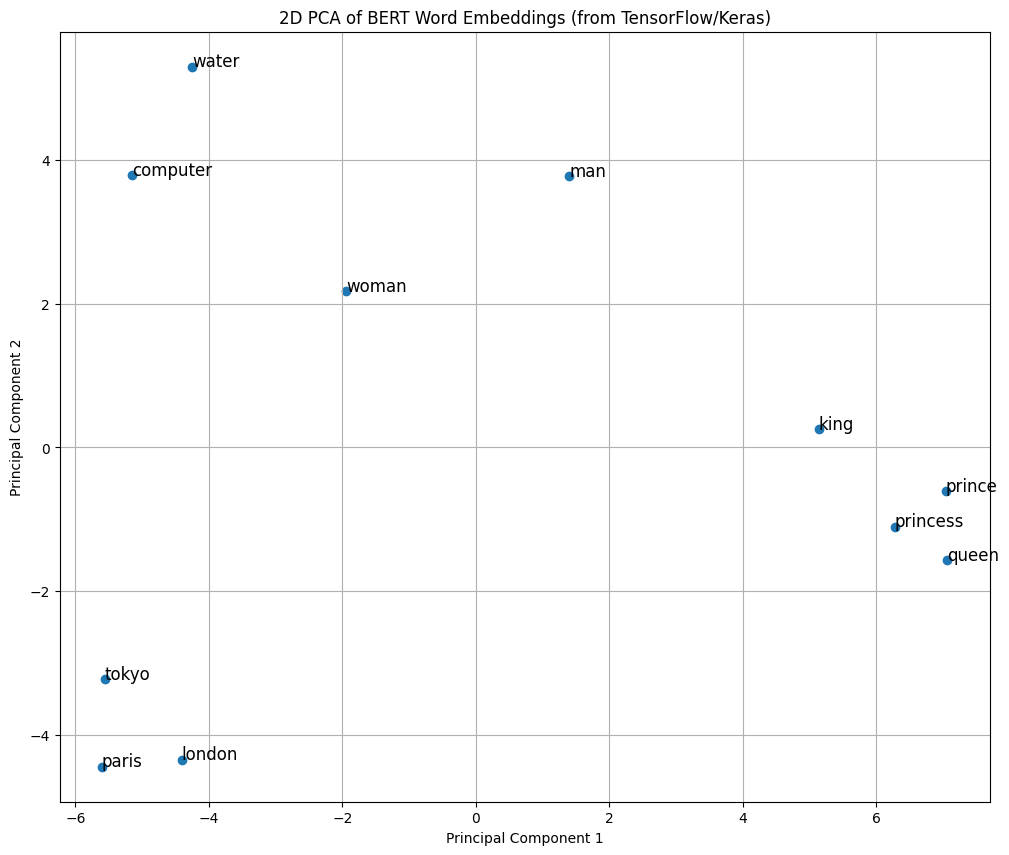

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# A list of words to visualize
words = ["king", "queen", "prince", "princess", "man", "woman", "london", "paris", "tokyo", "water", "computer"]
text_for_viz = " ".join(words)

# Tokenize and get embeddings using our TF model
inputs_viz = tokenizer(text_for_viz, return_tensors="tf")
outputs_viz = model(inputs_viz)
embeddings_viz = outputs_viz.last_hidden_state

# We need to align tokens with our original words, which can be tricky with subwords.
# For this simple case, we can assume one-to-one mapping, skipping [CLS] and [SEP]
token_embeddings = embeddings_viz[0, 1:-1] # Exclude [CLS] and [SEP]
tokens_viz = tokenizer.convert_ids_to_tokens(inputs_viz['input_ids'][0])[1:-1]

# Check if our tokens match our words
if len(tokens_viz) != len(words):
  print("Warning: Subword tokenization created a mismatch. Visualization may be inaccurate.")
  print("Words:", words)
  print("Tokens:", tokens_viz)

# Reduce 768 dimensions to 2 using PCA
pca = PCA(n_components=2)
# .numpy() converts the TensorFlow tensor to a NumPy array for scikit-learn
embeddings_2d = pca.fit_transform(token_embeddings.numpy())

# Create the plot
plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

# Add labels to each point
for i, word in enumerate(tokens_viz):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=12)

plt.title("2D PCA of BERT Word Embeddings (from TensorFlow/Keras)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

Look at the plot!

- king, queen, prince, princess, man, and woman are all clustered together in a "royalty/people" group.

- london, paris, and tokyo are clustered in a "cities" group.
water and computer are off on their own, distinct from the other concepts.

- This is a visual confirmation that the embeddings have successfully learned semantic relationships from the data they were trained on.




## Conclusion

- Tokenize raw text into numerical input_ids using a sophisticated subword tokenizer.

- Generate Embeddings by passing these IDs through a powerful Transformer model like BERT.

- Appreciate that these embeddings are contextual and capture the semantic meaning of words in a way that allows for amazing downstream performance.

- These embeddings are the foundation upon which everything else is built. Whether you're doing text classification, question answering, or text generation, the process will always start by turning your text into these meaningful vectors.

Next Steps for Exploration:

- Try different sentences and see how the tokenizer and embeddings change.
Look up other models on the Hugging Face Hub (e.g., roberta-base, distilbert-base-uncased).

- Think about how these embeddings could be used. For example, you could average all the token embeddings in a sentence to get a single vector representing the entire sentence's meaning.

## TensorFlow Embedding Projector

https://projector.tensorflow.org/